# The influence of lifestyle on stress levels

##### Finding the features that most impact stress levels

> Lifestyle significantly affects stress levels, involving factors such as physical activity, profession, blood pressure, age, sleep quality, BMI, and sex. Regular exercise releases endorphins that promote well-being, while demanding jobs and daily pressures increase stress. A balanced diet and maintaining a healthy BMI help reduce physical stress. Sleep quality is crucial, as inadequate rest raises cortisol levels, exacerbating stress. Additionally, men and women handle stress differently, requiring personalized approaches for each gender. Adopting a healthy lifestyle is essential for managing stress and improving overall quality of life. 

## 1. Importing necessary libraries

In [457]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

## 2. Reading the data

In [458]:
lifestyle_df = pd.read_csv('/Users/fartes/Desktop/Databases - Kaggle/Regression/Sleep_health_and_lifestyle_dataset.csv')

## 3. Exploring data analysis (EDA)

In [459]:
#3.1. Visualizing the data to explore the dataset
lifestyle_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [480]:
#3.2. Analyzing the shape (rows, columns)
lifestyle_df.shape

(374, 13)

In [479]:
#3.3. Analyzing the type of data
print(lifestyle_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In the cell above, it's possible to see the number of NaN (Not a Number) values. So, we will need 

In [481]:
#3.4. Analyzing NaN values
print(lifestyle_df.isna().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [463]:
#3.5. Verifying the NaN values in the 'Sleep Disorder' column
lifestyle_df_verified = lifestyle_df.copy()
lifestyle_df_verified['Sleep Disorder'] = lifestyle_df['Sleep Disorder'].fillna('Normal')
Sleep_disorder = lifestyle_df_verified.groupby('Sleep Disorder')[['Quality of Sleep','Sleep Duration']].mean()
print(Sleep_disorder)

                Quality of Sleep  Sleep Duration
Sleep Disorder                                  
Insomnia                6.532468        6.589610
Normal                  7.625571        7.358447
Sleep Apnea             7.205128        7.032051


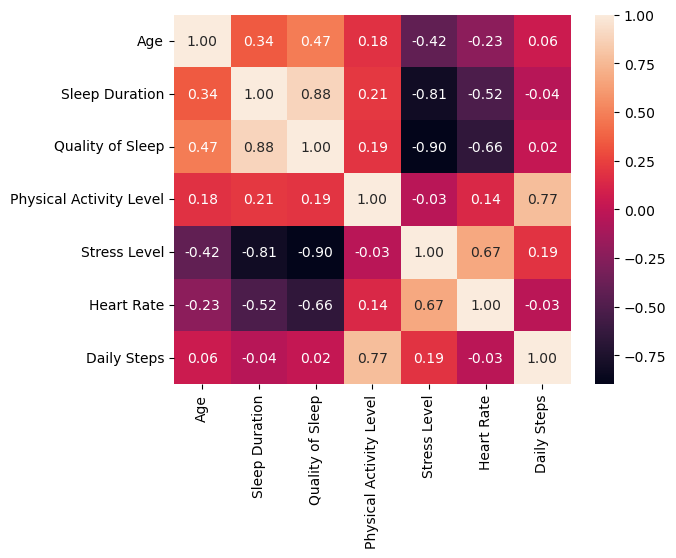

In [464]:
# 3.6. Understanding the correlation 

lifestyle_df_corr = lifestyle_df[['Age', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 
                                 'Heart Rate', 'Daily Steps']]


fig, ax = plt.subplots()
sns.heatmap(lifestyle_df_corr.corr(),annot = True, fmt= '.2f')
plt.show()

In [465]:
# 3.6. Understanding the correlation
lifestyle_df_corr.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [466]:
# 3.7. Verifying the variation of features
lifestyle_df_corr.var()

Age                        7.522324e+01
Sleep Duration             6.330696e-01
Quality of Sleep           1.432703e+00
Physical Activity Level    4.339224e+02
Stress Level               3.148944e+00
Heart Rate                 1.710381e+01
Daily Steps                2.617651e+06
dtype: float64

In [467]:
#3.8 Verifying the principal statistics
lifestyle_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


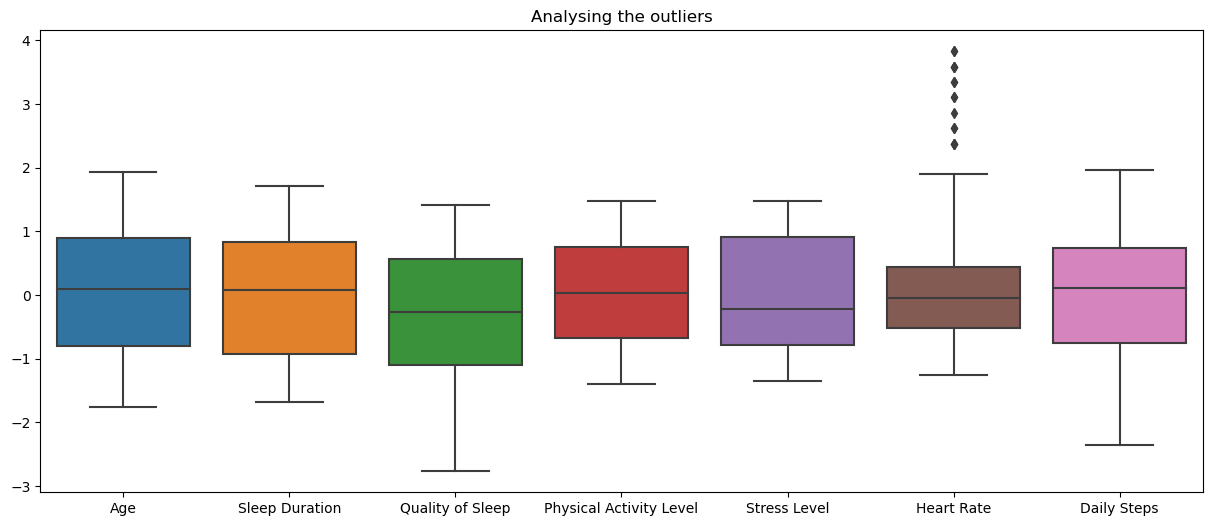

In [482]:
#3.9 Normalizing the data to identify outliers
df_normalized = lifestyle_df_corr.apply(lambda x: (x - x.mean()) / x.std())

#Creating a boxplot to identify columns with outliers
plt.figure(figsize=(15, 6))
sns.boxplot(df_normalized)
plt.title('Analysing the outliers') 
plt.show()


#3.10. Identifying and filtering outliers
Q1 = lifestyle_df_corr.quantile(0.25)
Q3 = lifestyle_df_corr.quantile(0.75)
IQR = Q3 - Q1

outliers = ((lifestyle_df_corr < (Q1 - 1.5 * IQR)) | (lifestyle_df_corr > (Q3 + 1.5 * IQR)))
outliers_dataframe = outliers[outliers.any(axis=1)] 
lifestyle_df_verified = lifestyle_df_verified[~lifestyle_df_verified.index.isin(outliers_dataframe.index)]

## 4. Data Preprocessing

> In this step, will be created a test dataset with 'Sleep Disorder' column and other without that column to see the impact in the prediction in the Stress Level

In [483]:
lifestyle_df_verified.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal


In [470]:
# 4.1 Changing the 'Blood Pressure' column
lifestyle_df_model = lifestyle_df_verified.copy()
lifestyle_df_model['Systolic pressure'] = lifestyle_df_verified['Blood Pressure'].str[0:3]
lifestyle_df_model['Diastolic pressure'] = lifestyle_df_verified['Blood Pressure'].str[-2:]
lifestyle_df_model = lifestyle_df_model.drop(columns='Blood Pressure',axis=1)

#4.2 Changing the 'Systolic Pressure' and 'Diastolic Pressure' columns to float
lifestyle_df_model['Systolic pressure'] = lifestyle_df_model['Systolic pressure'].astype('float')
lifestyle_df_model['Diastolic pressure'] = lifestyle_df_model['Diastolic pressure'].astype('float')

#4.3 Changing 'Stress Level' column to float
lifestyle_df_model['Stress Level'] = lifestyle_df_model['Stress Level'].astype('float')
lifestyle_df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                359 non-null    int64  
 1   Gender                   359 non-null    object 
 2   Age                      359 non-null    int64  
 3   Occupation               359 non-null    object 
 4   Sleep Duration           359 non-null    float64
 5   Quality of Sleep         359 non-null    int64  
 6   Physical Activity Level  359 non-null    int64  
 7   Stress Level             359 non-null    float64
 8   BMI Category             359 non-null    object 
 9   Heart Rate               359 non-null    int64  
 10  Daily Steps              359 non-null    int64  
 11  Sleep Disorder           359 non-null    object 
 12  Systolic pressure        359 non-null    float64
 13  Diastolic pressure       359 non-null    float64
dtypes: float64(4), int64(6), object

In [471]:
# 4.4 Changing categorical data in numerical data to apply in the model 
lifestyle_df_dummies = pd.get_dummies(lifestyle_df_model, columns = ['Gender','Occupation','BMI Category','Sleep Disorder'], dtype=float)

## 5. Model Selection and Training

In [475]:
#5.1 Separating features and target 
y = lifestyle_df_dummies['Stress Level']
X = lifestyle_df_dummies.drop(columns=['Stress Level'], axis=1)

#5.2 Splitting the data 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123) 

#5.3 Training the data 
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10, seed=123)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 6. Model Evaluation

In [473]:
y_predict = model.predict(X_test) 
MSE_model = mean_squared_error(y_test, y_predict)
print('The mean squared error (MSE) for model 1 is: %.2f' % MSE_model)

The mean squared error (MSE) for model 1 is: 0.03


## 7. Final Validation and Results

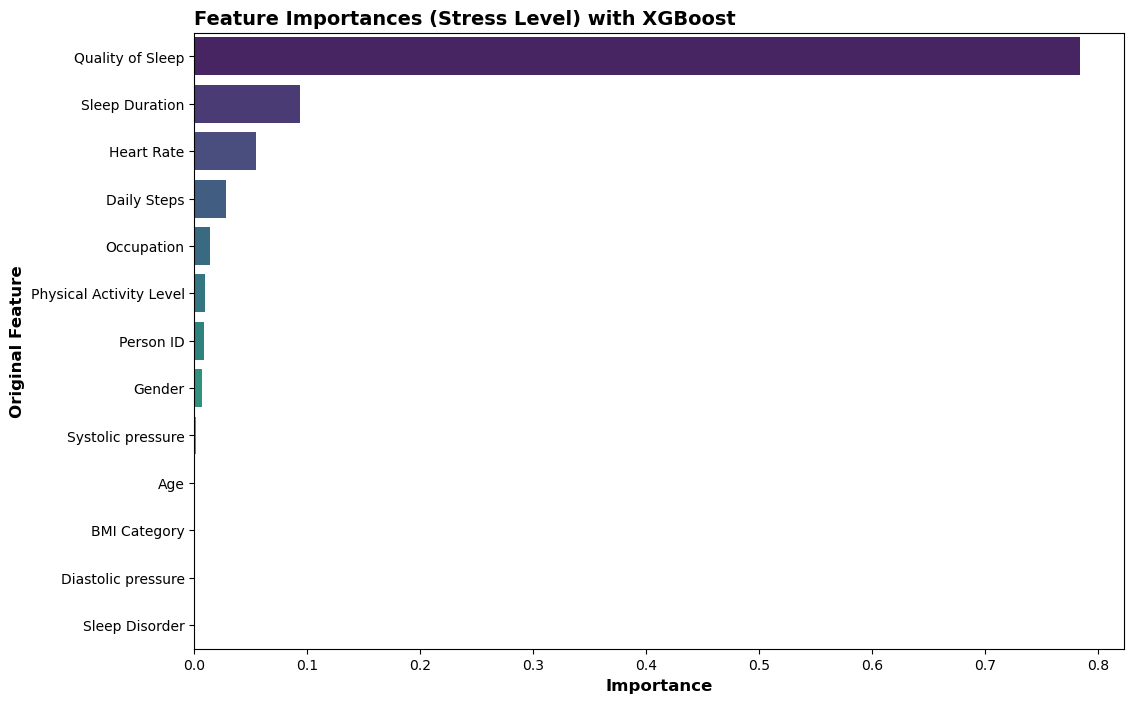

In [478]:
#7.1. Comparing the original dataframe with the predicted values
list1 = y_predict.tolist()

df_result = pd.DataFrame({'Stress level':y_test,
                  'Stress level Model':list1})

lifestyle_df_result = pd.merge(lifestyle_df_verified, df_result, left_index=True, right_index=True)
lifestyle_df_result = lifestyle_df_result.drop(columns='Stress Level', axis=1)

#7.2. Finding the feature importances 
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

#Remapping the features name 
mapping = {
    'Gender_Female': 'Gender', 'Gender_Male': 'Gender',
    'Occupation_Accountant': 'Occupation', 'Occupation_Doctor': 'Occupation',
    'Occupation_Engineer': 'Occupation', 'Occupation_Lawyer': 'Occupation',
    'Occupation_Manager': 'Occupation', 'Occupation_Nurse': 'Occupation',
    'Occupation_Salesperson': 'Occupation', 'Occupation_Scientist': 'Occupation',
    'Occupation_Software Engineer': 'Occupation', 'Occupation_Teacher': 'Occupation',
    'BMI Category_Normal': 'BMI Category', 'BMI Category_Normal Weight': 'BMI Category',
    'BMI Category_Overweight': 'BMI Category',
    'Sleep Disorder_Insomnia': 'Sleep Disorder', 'Sleep Disorder_Normal': 'Sleep Disorder',
    'Sleep Disorder_Sleep Apnea': 'Sleep Disorder'
          }

importance_df['Original Feature'] = importance_df['Feature'].map(mapping).fillna(importance_df['Feature'])
grouped_importance_df = importance_df.groupby('Original Feature').sum().reset_index()
grouped_importance_df = grouped_importance_df.sort_values(by='Importance', ascending=False)

#Plotting a bar plot of feature importances, ordered by importance 
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Original Feature', data=grouped_importance_df, palette='viridis')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Original Feature', fontsize=12, fontweight='bold')
plt.title('Feature Importances (Stress Level) with XGBoost', fontsize=14, fontweight='bold', loc='left')
plt.show()

> As we can see, features related to sleep are the most important for predicting stress levels. The predictive importance of 'Quality of Sleep' in the model was approximately 78.4%. It’s important to distinguish that we are referring to the quality of sleep, not just its duration. The 'Sleep Duration' feature, which measures the total time spent sleeping, is the second most important, contributing around 9.34% to the model's predictions. Additionally, this analysis used a dataset from Kaggle named 'Sleep_health_and_lifestyle_dataset,' but the method of data collection is unknown, which may affect its efficiency. This could potentially explain the high correlation observed between sleep quality and stress levels.